# 4.10 Instacart Final Task

# Contents

# Import Libraries and Dataframes

# Create regional segmentation of data

# Determine whether there’s a difference in spending habits between the different U.S. regions

# Create an exclusion flag for low-activity customers

# Customer profiling

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

# Compare customer profiles with regions and departments

# Visualizations

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# importing library
path = r"C:\your\base\directory"
input_dir = os.path.join(path, '02 Data', 'Prepared Data')

In [4]:
pickle_file = os.path.join(input_dir, 'ords_prods_cust_merge.pkl')

In [5]:
ords_prods_cust_merge = pd.read_pickle(pickle_file)

# 3. Create a regional segmentation of the data

In [6]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2,202279,3,5,9,8.0,33120.0,1.0,1.0,both,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
1,2,202279,3,5,9,8.0,28985.0,2.0,1.0,both,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
2,2,202279,3,5,9,8.0,9327.0,3.0,0.0,both,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
3,2,202279,3,5,9,8.0,45918.0,4.0,1.0,both,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
4,2,202279,3,5,9,8.0,30035.0,5.0,0.0,both,...,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119


In [7]:
# Define the states for each region
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']
middle_atlantic_states = ['New York', 'Pennsylvania', 'New Jersey']
midwest_states = [
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',  # East North Central
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'  # West North Central
]
south_states = [
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
    'South Carolina', 'Georgia', 'Florida',  # South Atlantic
    'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',  # East South Central
    'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'  # West South Central
]
west_states = [
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',  # Mountain
    'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'  # Pacific
]

In [8]:
# Create a new 'Region' column with a default value
ords_prods_cust_merge['Region'] = 'Other'

In [9]:
# Assign regions based on the 'State' column
ords_prods_cust_merge.loc[ords_prods_cust_merge['State'].isin(northeast_states), 'Region'] = 'Northeast'
ords_prods_cust_merge.loc[ords_prods_cust_merge['State'].isin(middle_atlantic_states), 'Region'] = 'Middle Atlantic'
ords_prods_cust_merge.loc[ords_prods_cust_merge['State'].isin(midwest_states), 'Region'] = 'Midwest'
ords_prods_cust_merge.loc[ords_prods_cust_merge['State'].isin(south_states), 'Region'] = 'South'
ords_prods_cust_merge.loc[ords_prods_cust_merge['State'].isin(west_states), 'Region'] = 'West'

In [10]:
(ords_prods_cust_merge['Region'].value_counts())

Region
South              10791885
West                8292913
Midwest             7597325
Northeast           3791979
Middle Atlantic     1930757
Name: count, dtype: int64

In [11]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region
0,2,202279,3,5,9,8.0,33120.0,1.0,1.0,both,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West
1,2,202279,3,5,9,8.0,28985.0,2.0,1.0,both,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West
2,2,202279,3,5,9,8.0,9327.0,3.0,0.0,both,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West
3,2,202279,3,5,9,8.0,45918.0,4.0,1.0,both,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West
4,2,202279,3,5,9,8.0,30035.0,5.0,0.0,both,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West


# Determine whether there’s a difference in spending habits between the different U.S. regions

In [12]:
# Cross-tabulate Region and Spending Flag
spending_region_crosstab = pd.crosstab(ords_prods_cust_merge['Region'], ords_prods_cust_merge['spending_flag'], normalize='index')

In [13]:
# Multiply by 100 to get percentages
spending_region_percentage = spending_region_crosstab * 100

In [14]:
(spending_region_percentage)

spending_flag,High spender,Low spender
Region,,
Middle Atlantic,1.615429,98.384571
Midwest,2.053025,97.946975
Northeast,2.031525,97.968475
South,1.943043,98.056957
West,1.933627,98.066373


In [15]:
(ords_prods_cust_merge.columns)

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_range_loc', 'busiest day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'avg_product_price', 'median_days_between_orders',
       'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'State',
       'Age', 'Date Joined', 'Number of Dependents', 'Family Status', 'Income',
       'Region'],
      dtype='object')

# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [16]:
# Create an order count column by grouping by 'user_id'
ords_prods_cust_merge['order_count'] = ords_prods_cust_merge.groupby('user_id')['order_id'].transform('count')

In [17]:
# Create an exclusion flag for low-activity customers
ords_prods_cust_merge['exclusion_flag'] = ords_prods_cust_merge['order_count'].apply(lambda x: 'Exclude' if x < 5 else 'Keep')

In [18]:
# Filter out low-activity customers
filtered_data = ords_prods_cust_merge[ords_prods_cust_merge['exclusion_flag'] == 'Keep']

In [19]:
# Keep only essential columns before exporting
columns_to_keep = ['user_id', 'order_id', 'order_count', 'exclusion_flag', 'Region']  # Add relevant columns
reduced_data = filtered_data[columns_to_keep]

In [20]:
# Export the reduced dataset
export_path = os.path.join(path, '02 Data', 'Prepared Data', 'reduced_data.pkl')
reduced_data.to_pickle(export_path)

In [21]:
# Create a flag for customers with less than 5 orders
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'exclusion_flag'] = 'low-activity customer'
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] >= 5, 'exclusion_flag'] = 'high-activity customer'

In [22]:
ords_prods_cust_merge['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

# 5&6, Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles

In [23]:
# Define income group
ords_prods_cust_merge['income_group'] = 'Unknown'  # Default value
ords_prods_cust_merge.loc[ords_prods_cust_merge['Income'] <= 55000, 'income_group'] = 'Low-Income'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['Income'] > 55000) & (ords_prods_cust_merge['Income'] <= 150000), 'income_group'] = 'Middle-Income'
ords_prods_cust_merge.loc[ords_prods_cust_merge['Income'] > 150000, 'income_group'] = 'High-Income'

In [24]:
# Define age group
ords_prods_cust_merge['age_group'] = 'Unknown'  # Default value
ords_prods_cust_merge.loc[ords_prods_cust_merge['Age'] <= 25, 'age_group'] = 'Young Adult'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['Age'] > 25) & (ords_prods_cust_merge['Age'] <= 40), 'age_group'] = 'Adult'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['Age'] > 40) & (ords_prods_cust_merge['Age'] <= 65), 'age_group'] = 'Older Adult'
ords_prods_cust_merge.loc[ords_prods_cust_merge['Age'] > 65, 'age_group'] = 'Senior'

In [25]:
# Create the profile column with default value
ords_prods_cust_merge['profile'] = 'Other'

# Apply conditions
ords_prods_cust_merge.loc[
    (ords_prods_cust_merge['age_group'] == 'Young Adult') &
    (ords_prods_cust_merge['Number of Dependents'] == 0), 'profile'] = 'Single Young Adult'

ords_prods_cust_merge.loc[
    (ords_prods_cust_merge['age_group'] == 'Young Adult') &
    (ords_prods_cust_merge['Number of Dependents'] > 0), 'profile'] = 'Young Parent'

ords_prods_cust_merge.loc[
    (ords_prods_cust_merge['age_group'] == 'Adult') &
    (ords_prods_cust_merge['Number of Dependents'] == 0), 'profile'] = 'Single Adult'

ords_prods_cust_merge.loc[
    (ords_prods_cust_merge['age_group'] == 'Adult') &
    (ords_prods_cust_merge['Number of Dependents'] > 0), 'profile'] = 'Adult Parent'

ords_prods_cust_merge.loc[
    (ords_prods_cust_merge['age_group'] == 'Older Adult'), 'profile'] = 'Older Adult'

ords_prods_cust_merge.loc[
    (ords_prods_cust_merge['age_group'] == 'Senior'), 'profile'] = 'Senior'

In [26]:
# Check the counts of income groups
ords_prods_cust_merge['income_group'].value_counts(dropna = False)

income_group
Middle-Income    23614034
Low-Income        4739985
High-Income       4050840
Name: count, dtype: int64

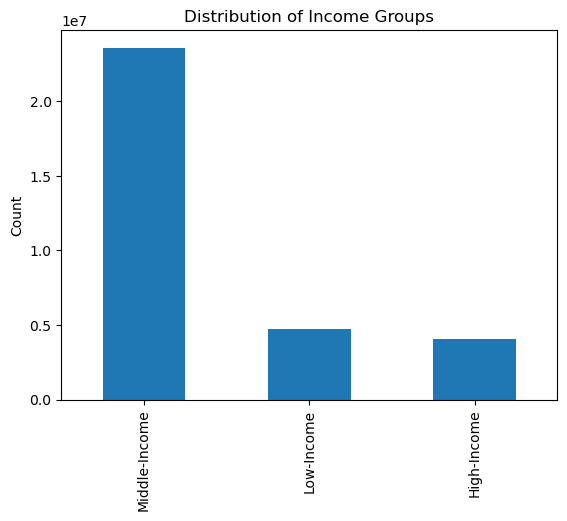

In [27]:
# Make a bar chart showing the distribution of income groups
income_group_counts = ords_prods_cust_merge['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [28]:
# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [33]:
# Step 1: Check if necessary columns exist
required_columns = ['profile', 'order_count', 'expenditure']
missing_columns = [col for col in required_columns if col not in ords_prods_cust_merge.columns]

In [36]:
if 'order_count' not in ords_prods_cust_merge.columns:
    # Assuming each row is a single order, we use a placeholder of 1 for `order_count`
    ords_prods_cust_merge['order_count'] = 1

if 'expenditure' not in ords_prods_cust_merge.columns:
    # Try creating `expenditure` using available columns
    if 'product_price' in ords_prods_cust_merge.columns:
        ords_prods_cust_merge['expenditure'] = ords_prods_cust_merge['product_price'] * ords_prods_cust_merge['order_count']
    elif 'order_total' in ords_prods_cust_merge.columns:
        ords_prods_cust_merge['expenditure'] = ords_prods_cust_merge['order_total']
    else:
        # If no relevant columns exist, assign a placeholder expenditure (e.g., $10 per order)
        print("Warning: 'expenditure' column missing. Assigning placeholder values.")
        ords_prods_cust_merge['expenditure'] = ords_prods_cust_merge['order_count'] * 10

In [37]:
 #Aggregate data
profile_aggregates = ords_prods_cust_merge.groupby('profile').agg(
    max_usage_frequency=('order_count', 'max'),
    mean_usage_frequency=('order_count', 'mean'),
    min_usage_frequency=('order_count', 'min'),
    max_expenditure=('expenditure', 'max'),
    mean_expenditure=('expenditure', 'mean'),
    min_expenditure=('expenditure', 'min')
).reset_index()

In [38]:
(profile_aggregates)

,profile,max_usage_frequency,mean_usage_frequency,min_usage_frequency,max_expenditure,mean_expenditure,min_expenditure
0,Adult Parent,2901,430.781421,3,29010,4307.814213,30
1,Older Adult,3637,420.846602,1,36370,4208.466020,10
2,Senior,3704,418.334813,2,37040,4183.348127,20
3,Single Adult,2429,417.431096,3,24290,4174.310964,30
4,Single Young Adult,2212,412.702010,3,22120,4127.020096,30
5,Young Parent,2577,426.246943,3,25770,4262.469426,30


# Comparing customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [43]:
# Define regions
regions = ['Northeast', 'Midwest', 'South', 'West']

In [44]:
# Randomly assign regions to customers
ords_prods_cust_merge['region'] = np.random.choice(regions, size=len(ords_prods_cust_merge))

In [45]:
# Aggregate data by profile, region, and department
profile_region_dept_agg = ords_prods_cust_merge.groupby(['profile', 'region', 'department_id']).agg(
    total_expenditure=('expenditure', 'sum'),
    avg_expenditure=('expenditure', 'mean'),
    total_orders=('order_count', 'sum'),
    avg_orders=('order_count', 'mean')
).reset_index()

In [48]:
(profile_region_dept_agg) 

,profile,region,department_id,total_expenditure,avg_expenditure,total_orders,avg_orders
0,Adult Parent,Midwest,1,396952650,4042.781704,39695265,404.278170
1,Adult Parent,Midwest,2,5594600,3803.263086,559460,380.326309
2,Adult Parent,Midwest,3,228992070,4471.628002,22899207,447.162800
3,Adult Parent,Midwest,4,1821554650,4352.517407,182155465,435.251741
4,Adult Parent,Midwest,5,20881410,3008.415214,2088141,300.841521
...,...,...,...,...,...,...,...
499,Young Parent,West,17,62275750,3602.669791,6227575,360.266979
500,Young Parent,West,18,55491290,5671.636345,5549129,567.163635
501,Young Parent,West,19,296926530,4375.639635,29692653,437.563964
502,Young Parent,West,20,106583640,4364.425699,10658364,436.442570


# Higher-income regions such as the West have greater expenditure per order across all profiles, while lower-income regions like south are conservative in spending

# Produce suitable charts to illustrate your results and export them in your project folder

In [49]:
heatmap_data = profile_region_dept_agg.pivot_table(
    index='profile', 
    columns='region', 
    values='avg_expenditure', 
    aggfunc='mean'
)

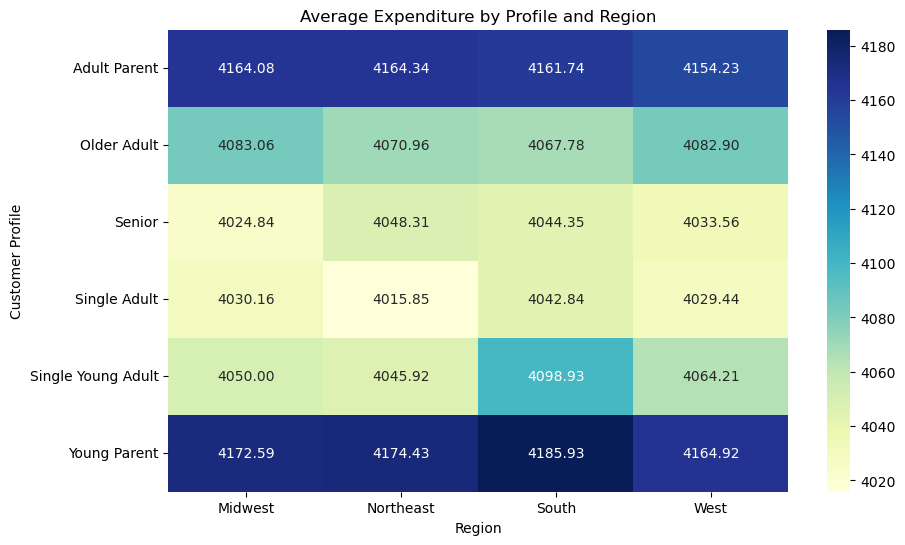

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Expenditure by Profile and Region')
plt.xlabel('Region')
plt.ylabel('Customer Profile')
plt.show()

In [58]:
region_profile_comparison = ords_prods_cust_merge.groupby(['region', 'profile']).agg(
    total_expenditure=('expenditure', 'sum'),
    mean_expenditure=('expenditure', 'mean'),
    max_expenditure=('expenditure', 'max'),
    min_expenditure=('expenditure', 'min'),
    total_usage_frequency=('order_count', 'sum'),
    mean_usage_frequency=('order_count', 'mean'),
).reset_index()

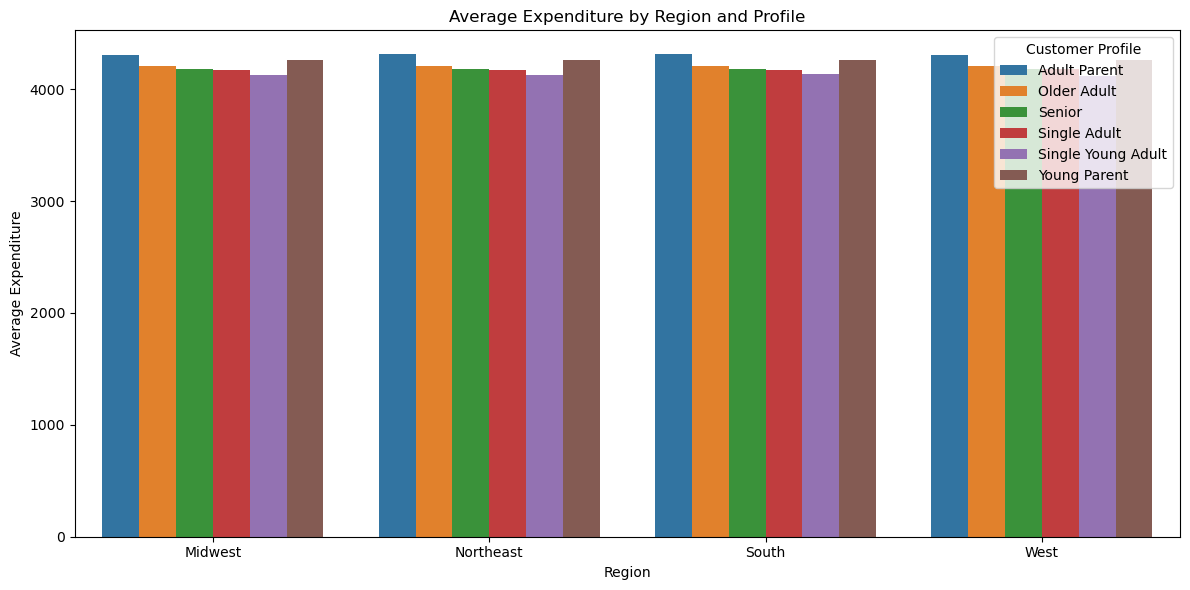

In [60]:
# Bar chart for average expenditure by region and profile
plt.figure(figsize=(12, 6))
sns.barplot(
    data=region_profile_comparison,
    x='region',
    y='mean_expenditure',
    hue='profile'
)
plt.title('Average Expenditure by Region and Profile')
plt.xlabel('Region')
plt.ylabel('Average Expenditure')
plt.legend(title='Customer Profile', loc='upper right')
plt.tight_layout()
plt.show()

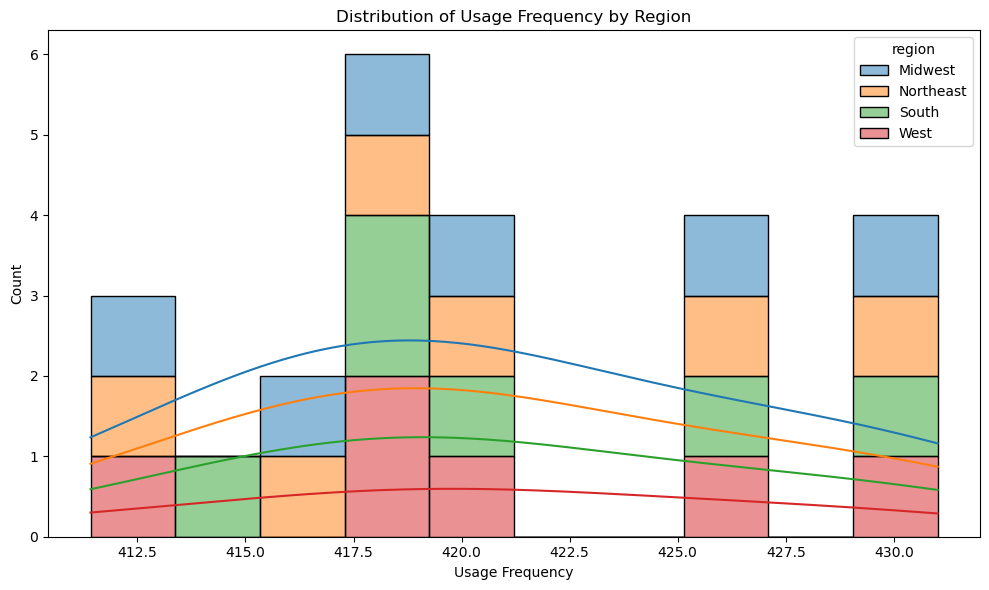

In [63]:
# Histogram for usage frequency
plt.figure(figsize=(10, 6))
sns.histplot(
    data=region_profile_comparison,
    x='mean_usage_frequency',
    hue='region',
    multiple='stack',
    bins=10,
    kde=True
)
plt.title('Distribution of Usage Frequency by Region')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [64]:
# Create a subset for one region (e.g., Region 1 - Northeast)
region_1_data = region_profile_comparison[region_profile_comparison['region'] == 'Region 1']

In [69]:
# Pivot data for stacked bar chart
pivot_data = region_profile_comparison.pivot_table(
    index='region', columns='profile', values='mean_expenditure', aggfunc='sum'
)

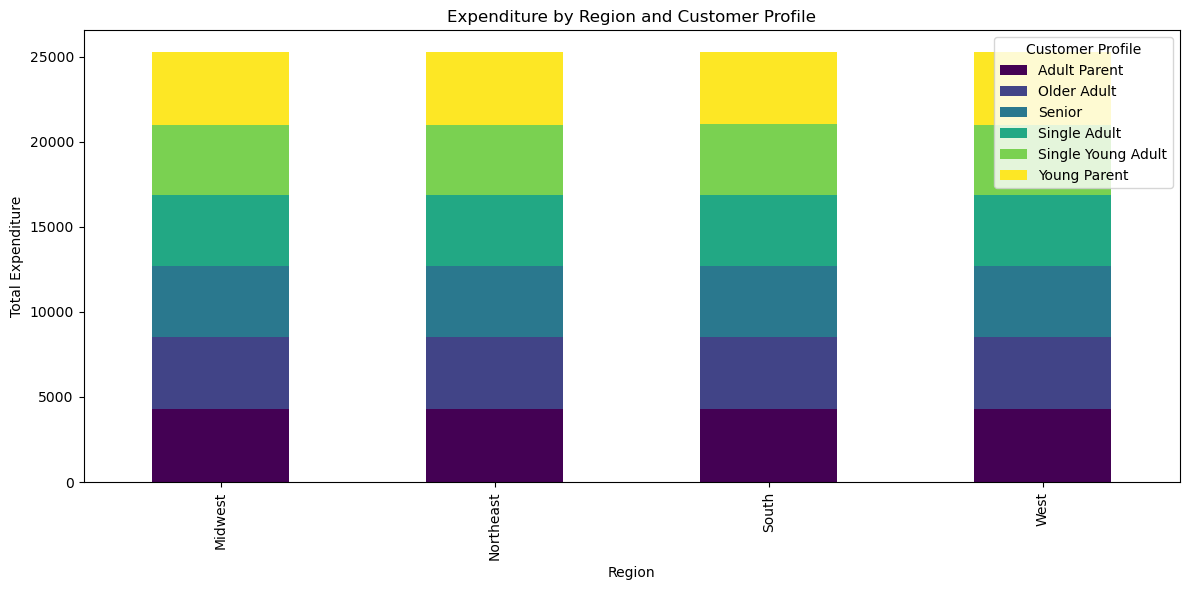

In [72]:
# Stacked bar chart
pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)
plt.title('Expenditure by Region and Customer Profile')
plt.xlabel('Region')
plt.ylabel('Total Expenditure')
plt.legend(title='Customer Profile', loc='upper right')
plt.tight_layout()
plt.show()